3.2


In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/peterwu19881230/test_repo/master/hw1_input.csv')
df = pd.get_dummies(df)
df = pd.DataFrame(df)
x = df.iloc[:, 0:-2]
y = df.iloc[:,-1:]

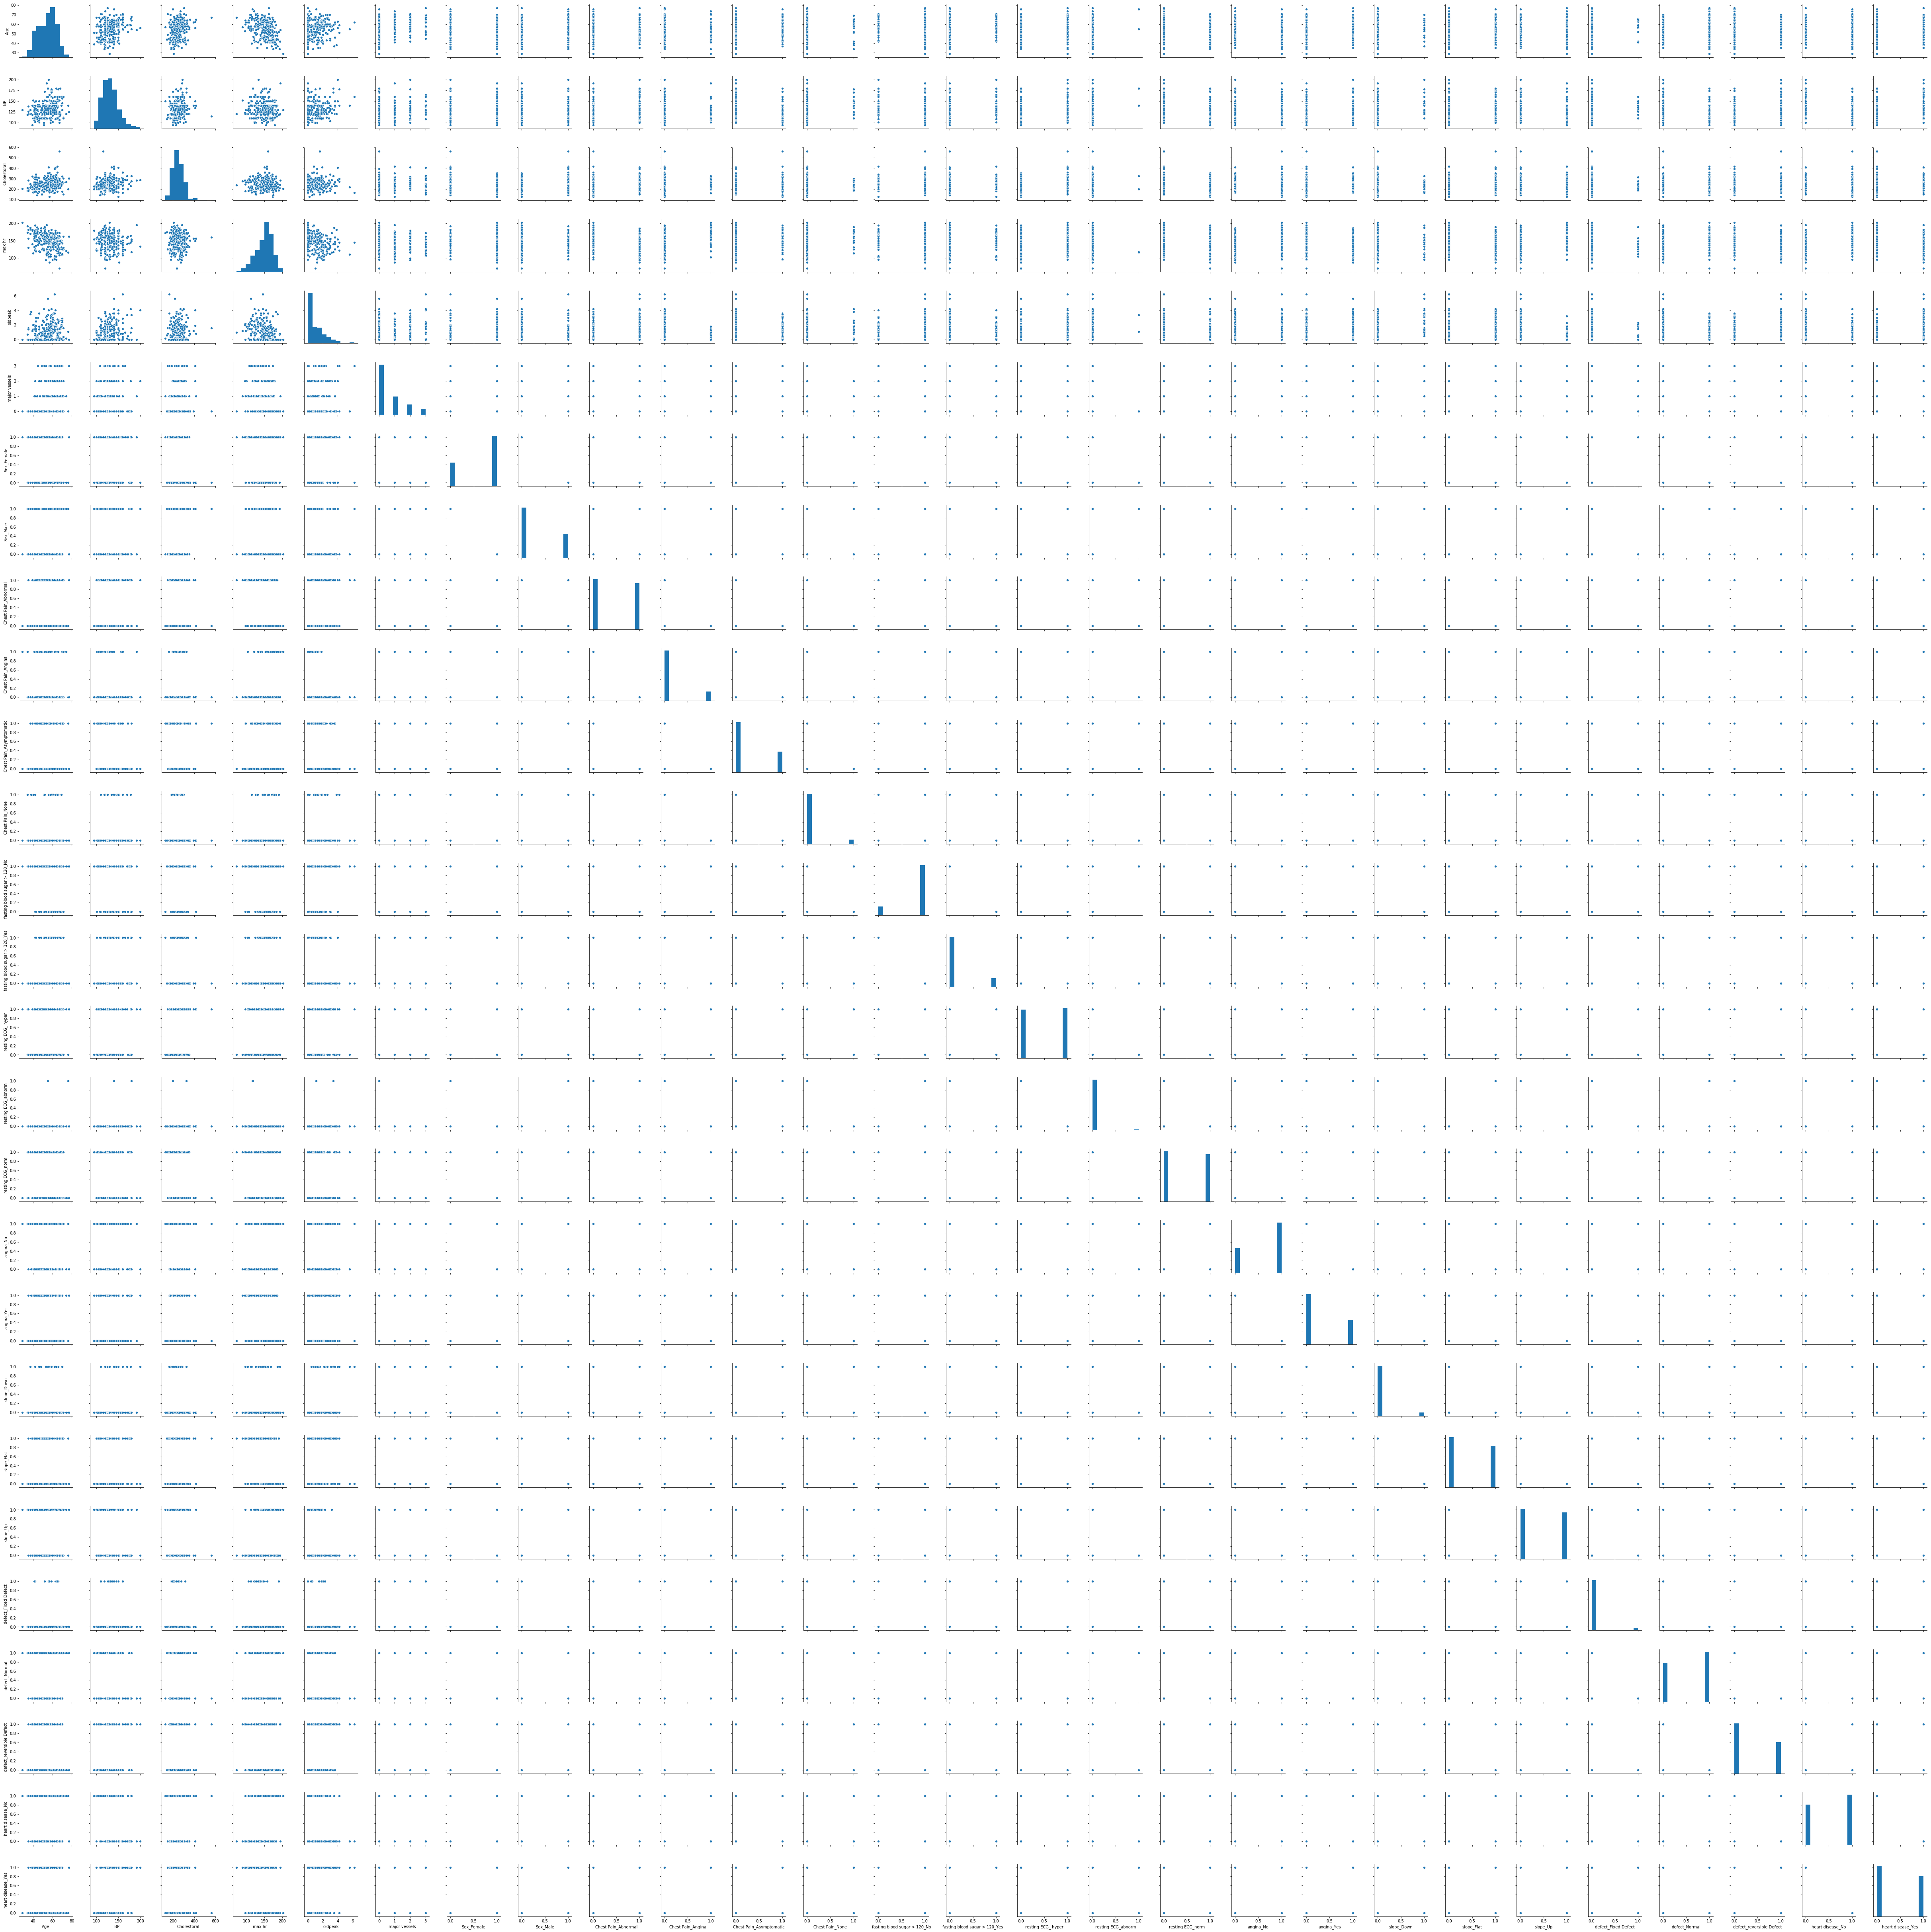

In [15]:
sns.pairplot(df)

In [0]:
n_bootstraps = 1000

n_test  = int(0.2*len(df))
n_train = len(df) - n_test
ridgeAUROC = []
lassoAUROC = []
ridgeF1 = []
lassoF1 = []
ridgeCoefficients_results = []
lassoCoefficients_results  = []

def most_frequent(List): 
    return max(set(List), key = List.count)

for _ in range(n_bootstraps):

    train_test_indicator = np.asarray([True]*n_train + [False]*n_test)
    np.random.shuffle(train_test_indicator)
    
    x_train, x_test, y_train, y_test = x[train_test_indicator], x[np.logical_not(train_test_indicator)], y[train_test_indicator], y[np.logical_not(train_test_indicator)]
    
    ridge_regressor = Ridge(alpha = most_frequent(chosen_hyperparam_dict['ridge_reg']),max_iter = max_iter)
    ridge_regressor.fit(x_train, y_train)

    lasso_regressor = Lasso(alpha = most_frequent(chosen_hyperparam_dict['lasso_reg']), max_iter = max_iter)
    lasso_regressor.fit(x_train, y_train)
    
    ridgeCoefficients_results.append(ridge_regressor.coef_)
    lassoCoefficients_results.append(lasso_regressor.coef_)
    ridgeAUROC.append(roc_auc_score(y_test, ridge_regressor.predict(x_test)))
    lassoAUROC.append(roc_auc_score(y_test, lasso_regressor.predict(x_test)))
    ridgeF1.append(roc_auc_score(y_test, ridge_regressor.predict(x_test)))
    lassoF1.append(roc_auc_score(y_test, lasso_regressor.predict(x_test)))



avg_Coeff_Ridge = np.mean(ridgeCoefficients_results, axis = 0)
avg_Coeff_Lasso = np.mean(lassCoefficients_results, axis = 0)
std_Coeff_Lasso = np.std(lassCoefficients_results, axis = 0)
std_Coeff_Ridge = np.std(ridgeCoefficients_results, axis = 0)
# print(avg_Coeff_Ridge, avg_Coeff_Lasso)
# print(std_Coeff_Ridge, std_Coeff_Lasso)

NameError: ignored